<a href="https://colab.research.google.com/github/Anusarakh/thesis/blob/main/13_Match_24_Balnce_Class_Under_Sampling_MODEL_FV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model for Balance Class

In [1]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

#เข้าไป path ใน google drive
import os
os.chdir('/content/gdrive/MyDrive/Thesis/song/')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

Mounted at /content/gdrive
/content/gdrive/MyDrive/Thesis/song


In [2]:

import pandas as pd

df_mean = pd.read_csv('./df_mean.csv')
df_mean = df_mean.drop(columns=['Unnamed: 0'])

In [3]:
df_mean.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
0,-337.519196,87.713432,-53.715721,24.611067,-2.806135,30.887583,-7.148528,8.066414,-10.892271,-6.455784,...,1.112836,0.827766,1.159201,-3.363875,2416.442970,2967.178980,0.054564,88.341346,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
1,-278.316895,78.383743,-54.988056,24.794113,-16.298620,29.786844,-15.504882,17.004032,-17.566490,-2.575557,...,-1.479412,-2.492936,4.362127,-2.547994,2928.497072,3564.770500,0.064016,149.796196,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
2,-350.177734,87.633232,-35.294605,15.607519,-20.191923,27.530233,-16.834919,12.593234,-14.815981,-6.088560,...,4.112645,-1.948760,3.774892,-3.367366,2605.486756,3336.664234,0.057736,94.825115,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
3,-320.999725,83.712631,-79.178917,33.140160,-3.795424,35.310833,-3.274970,9.303452,-10.393191,-0.385238,...,-2.097873,-1.944651,4.207465,-0.871529,2567.362198,3006.088398,0.057116,117.453835,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
4,-311.984467,96.372902,-52.377079,18.820795,-19.120331,31.577271,-6.311707,6.418894,-17.262781,-5.944652,...,1.359192,-5.059598,3.112498,0.699753,2277.861900,2994.578379,0.051328,154.267724,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...


In [7]:
path = df_mean[df_mean['y']== 0]['path'].tolist()

In [10]:
from random import sample
res_samle_0 = sample(path,int(len(path)))

In [11]:
train = df_mean[df_mean['path'].isin(res_samle_0)]
train['split'] = 'train'
test = df_mean[~df_mean['path'].isin(res_samle_0)]
test['split'] = 'test'

df_all = train.append(test)
print(df_all.shape)
df_all.head()

(82, 27)


<ipython-input-11-d13c214b5ed7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['split'] = 'train'
<ipython-input-11-d13c214b5ed7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['split'] = 'test'
<ipython-input-11-d13c214b5ed7>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = train.append(test)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,spec,specband,zero,tempo,y,path,split
0,-337.519196,87.713432,-53.715721,24.611067,-2.806135,30.887583,-7.148528,8.066414,-10.892271,-6.455784,...,0.827766,1.159201,-3.363875,2416.442970,2967.178980,0.054564,88.341346,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
1,-278.316895,78.383743,-54.988056,24.794113,-16.298620,29.786844,-15.504882,17.004032,-17.566490,-2.575557,...,-2.492936,4.362127,-2.547994,2928.497072,3564.770500,0.064016,149.796196,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
2,-350.177734,87.633232,-35.294605,15.607519,-20.191923,27.530233,-16.834919,12.593234,-14.815981,-6.088560,...,-1.948760,3.774892,-3.367366,2605.486756,3336.664234,0.057736,94.825115,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
3,-320.999725,83.712631,-79.178917,33.140160,-3.795424,35.310833,-3.274970,9.303452,-10.393191,-0.385238,...,-1.944651,4.207465,-0.871529,2567.362198,3006.088398,0.057116,117.453835,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
4,-311.984467,96.372902,-52.377079,18.820795,-19.120331,31.577271,-6.311707,6.418894,-17.262781,-5.944652,...,-5.059598,3.112498,0.699753,2277.861900,2994.578379,0.051328,154.267724,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train


##Balnce Class

Over Sampling (เพิ่มจำนวนคลาสที่น้อยกว่าใหเเท่าคลาสที่มากกว่า)

In [12]:
df_all_0 = df_all[df_all_['y'] == 0]
df_all_1 = df_all[df_all_['y'] == 1]

print(f'# rain ก่อน Balance class')
print(f'class 0 :{len(df_all_0)}')
print(f'class 1 :{len(df_all_1)}')

# หลัง Balance class
df_all_1 = df_all_1.sample(n = len(df_all_0), replace=True)
print(f'# หลัง Balance class')
print(f'class 0 :{len(df_all_0)}')
print(f'class 1 :{len(df_all_1)}')

NameError: name 'df_all_' is not defined

In [ ]:
# รวมตารางอีกครั้ง ก่อนแยก X,y
df_all_total = df_all_0.append(df_all_1) #df_all_total คือ data ที่นำไปใช้ในการสร้างตัวแบบจำแนก

X_train = df_all_total.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = df_all_total.iloc[:, -3]
y_test = test.iloc[:, -3]

<ipython-input-20-4feb4fff6216>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_total = df_all_0.append(df_all_1) #df_all_total คือ data ที่นำไปใช้ในการสร้างตัวแบบจำแนก


##Traning Data

In [ ]:
train = df_all_total[df_all_total['split'] =='train']
test = df_all_total[df_all_total['split'] !='train']

# Balance class/ class ละ 65 sample โดยการสุ่ม class = 1 ให่มีจำนวนเท่ากับ class = 0

# train data ก่อน Balance class
train_y_0 = train[train['y'] == 0]
train_y_1 = train[train['y'] == 1]
print(f'# train data ก่อน Balance class')
print(f'class 0 :{len(train_y_0)}')
print(f'class 1 :{len(train_y_1)}')

# train data หลัง Balance class
train_y_1 = train_y_1.sample(n = len(train_y_0), replace=True)
print(f'# train data หลัง Balance class')
print(f'class 0 :{len(train_y_0)}')
print(f'class 1 :{len(train_y_1)}')


# test data ก่อน Balance class
test_0 = test[test['y'] == 0]
test_1 = test[test['y'] == 1]
print(f'# test data ก่อน Balance class')
print(f'class 0 :{len(test_0)}')
print(f'class 1 :{len(test_1)}')

# test data หลัง Balance class
test_1 = test_1.sample(n = len(test_0), replace=True)
print(f'# train data หลัง Balance class')
print(f'class 0 :{len(test_0)}')
print(f'class 1 :{len(test_1)}')


# รวมตารางอีกครั้ง ก่อนแยก X,y
train = train_y_0.append(train_y_1)
test = test_0.append(test_1)

X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

# train data ก่อน Balance class
class 0 :36
class 1 :37
# train data หลัง Balance class
class 0 :36
class 1 :36
# test data ก่อน Balance class
class 0 :10
class 1 :9
# train data หลัง Balance class
class 0 :10
class 1 :10


<ipython-input-40-a84a8168a7fb>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train_y_0.append(train_y_1)
<ipython-input-40-a84a8168a7fb>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test_0.append(test_1)


#3️⃣ ML// Random Forest Classifier

###Mean fv

In [ ]:
import os
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

1.4.1 criterion กำหนด ‘entropy’ และ ‘gini’

1.4.2 n_estimators กำหนด 100, 200, 400, และ 500

1.4.3 maxdepth กำหนด 5, 10, 15, 20, 25 และ 30

In [ ]:
train = train_y_0.append(train_y_1)

X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

n_estimators = [100, 200, 400, 500]
max_depth = [5, 10, 15, 20, 25, 30]
criterion = ['entropy', 'gini']
#min_samples_split = [2, 5, 10, 15, 100]
forest = RandomForestClassifier(random_state = 1)
hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'criterion' : criterion} #, 'min_samples_split' : min_samples_split}
gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)
bestF_ = bestF.best_params_

forestOpt = RandomForestClassifier(random_state = 1, max_depth = bestF_['max_depth'], n_estimators = bestF_['n_estimators'], criterion = bestF_['criterion']) #, min_samples_split =bestF_['min_samples_split'])
modelOpt = forestOpt.fit(X_train, y_train)

print(bestF_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


<ipython-input-42-8b8d04568e59>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train_y_0.append(train_y_1)


{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 400}


In [ ]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.846429,0.172060,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
1,0.876786,0.182885,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
2,0.876786,0.182885,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
3,0.876786,0.182885,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
4,0.862500,0.139709,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
5,0.891071,0.149926,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
6,0.876786,0.182885,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
7,0.876786,0.182885,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
8,0.862500,0.139709,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."
9,0.891071,0.149926,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."


In [ ]:
y_pred = modelOpt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       1.00      0.10      0.18        10

    accuracy                           0.55        20
   macro avg       0.76      0.55      0.44        20
weighted avg       0.76      0.55      0.44        20

[[10  0]
 [ 9  1]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

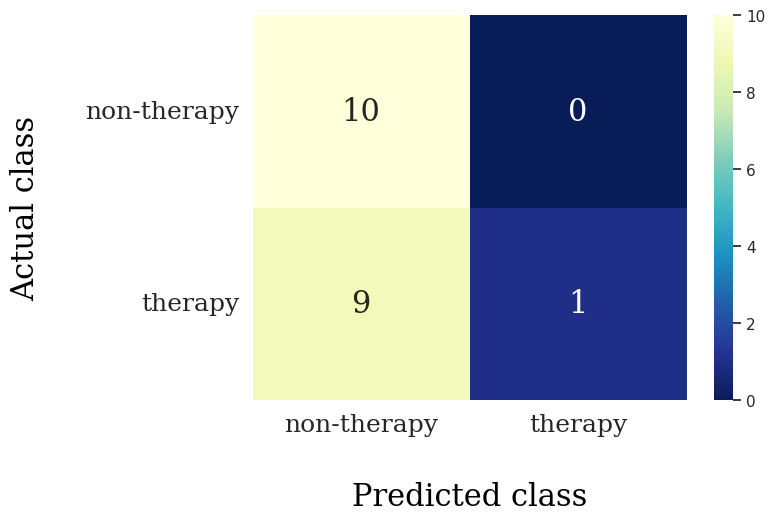

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

###Mean fv- Normalization

In [ ]:
train = train_y_0.append(train_y_1)

X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]


X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm


n_estimators = [100, 200, 400, 500]
max_depth = [5, 10, 15, 20, 25, 30]
criterion = ['entropy', 'gini']
#min_samples_split = [2, 5, 10, 15, 100]
forest = RandomForestClassifier(random_state = 1)
hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'criterion' : criterion} #, 'min_samples_split' : min_samples_split}
gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train_norm, y_train)
bestF_ = bestF.best_params_

forestOpt = RandomForestClassifier(random_state = 1, max_depth = bestF_['max_depth'], n_estimators = bestF_['n_estimators'], criterion = bestF_['criterion']) #, min_samples_split =bestF_['min_samples_split'])
modelOpt = forestOpt.fit(X_train_norm, y_train)

print(bestF_)

<ipython-input-46-57de96a4054c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train_y_0.append(train_y_1)


Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}


In [ ]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.848214,0.146657,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
1,0.876786,0.145610,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
2,0.876786,0.145610,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
3,0.876786,0.145610,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
4,0.862500,0.139709,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
5,0.891071,0.149926,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
6,0.876786,0.145610,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
7,0.876786,0.145610,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
8,0.862500,0.139709,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."
9,0.891071,0.149926,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."


In [ ]:
y_pred = modelOpt.predict(X_test_norm)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20

[[10  0]
 [10  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

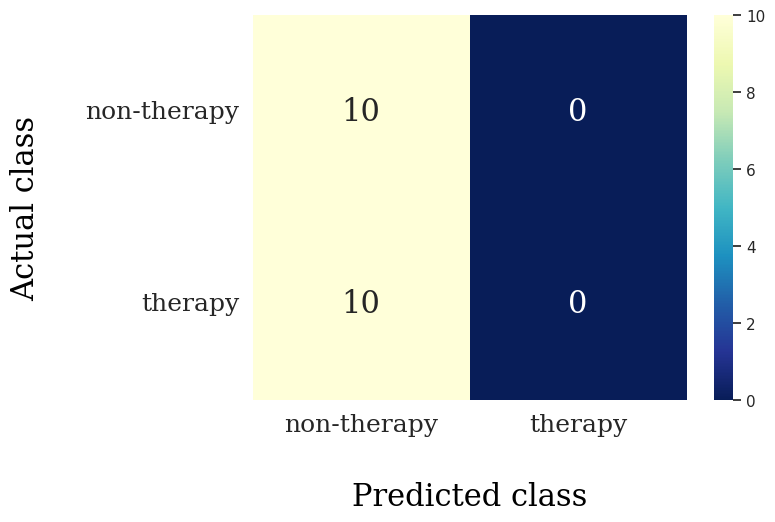

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

#4️⃣ ML // SVM Classifier

1.2.1) Kernel กำหนด ‘liner’, ‘rbf’ และ ‘poly’

1.2.2) Gamma กำหนด 0.001, 0.01, 0.1 และ 1

In [ ]:
train = train_y_0.append(train_y_1)

X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

<ipython-input-50-97b5cb723747>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train_y_0.append(train_y_1)


###Mean fv SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

#Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=10)

SVM = grid_search.fit(X_train, y_train)

# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")
bestS_ = SVM.best_params_
print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

**examine the first result 

{'gamma': 0.001, 'kernel': 'linear'}
0.8482142857142858

 **print the array of mean scores only 

[0.84821429 0.87678571 0.90357143 0.84821429 0.87678571 0.90357143
 0.84821429 0.87678571 0.90357143 0.84821429 0.87678571 0.90357143]

 **examine the best model 

0.9035714285714287
{'gamma': 0.001, 'kernel': 'poly'}
SVC(gamma=0.001, kernel='poly')


In [ ]:
import pandas as pd
results_df = pd.DataFrame(SVM.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# Display the DataFrame
print(results_df)

    mean_test_score  std_test_score                                params
0          0.848214        0.146657  {'gamma': 0.001, 'kernel': 'linear'}
1          0.876786        0.145610     {'gamma': 0.001, 'kernel': 'rbf'}
2          0.903571        0.090068    {'gamma': 0.001, 'kernel': 'poly'}
3          0.848214        0.146657   {'gamma': 0.01, 'kernel': 'linear'}
4          0.876786        0.145610      {'gamma': 0.01, 'kernel': 'rbf'}
5          0.903571        0.090068     {'gamma': 0.01, 'kernel': 'poly'}
6          0.848214        0.146657    {'gamma': 0.1, 'kernel': 'linear'}
7          0.876786        0.145610       {'gamma': 0.1, 'kernel': 'rbf'}
8          0.903571        0.090068      {'gamma': 0.1, 'kernel': 'poly'}
9          0.848214        0.146657      {'gamma': 1, 'kernel': 'linear'}
10         0.876786        0.145610         {'gamma': 1, 'kernel': 'rbf'}
11         0.903571        0.090068        {'gamma': 1, 'kernel': 'poly'}


In [ ]:

from sklearn import svm
svm= svm.SVC(random_state = 1, gamma = bestS_['gamma'], kernel = bestS_['kernel'])
modelOpt = svm.fit(X_train, y_train)


y_pred = modelOpt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.50      0.67        10

    accuracy                           0.75        20
   macro avg       0.83      0.75      0.73        20
weighted avg       0.83      0.75      0.73        20

[[10  0]
 [ 5  5]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

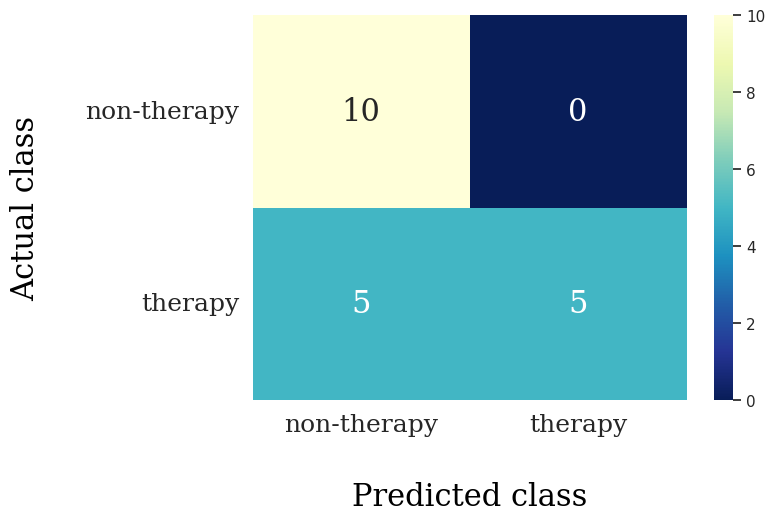

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

###Mean fv- Normalization SVM

In [ ]:
X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

#Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=10)

SVM = grid_search.fit(X_train_norm, y_train)

# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")
bestS_ = SVM.best_params_
print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

**examine the first result 

{'gamma': 0.001, 'kernel': 'linear'}
0.5178571428571429

 **print the array of mean scores only 

[0.51785714 0.51785714 0.48035714 0.51785714 0.51785714 0.48035714
 0.51785714 0.51785714 0.48035714 0.51785714 0.51785714 0.48035714]

 **examine the best model 

0.5178571428571429
{'gamma': 0.001, 'kernel': 'linear'}
SVC(gamma=0.001, kernel='linear')


In [ ]:

from sklearn import svm
svm= svm.SVC(random_state = 1, gamma = bestS_['gamma'], kernel = bestS_['kernel'])
modelOpt = svm.fit(X_train_norm, y_train)

y_pred = modelOpt.predict(X_test_norm)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20

[[10  0]
 [10  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

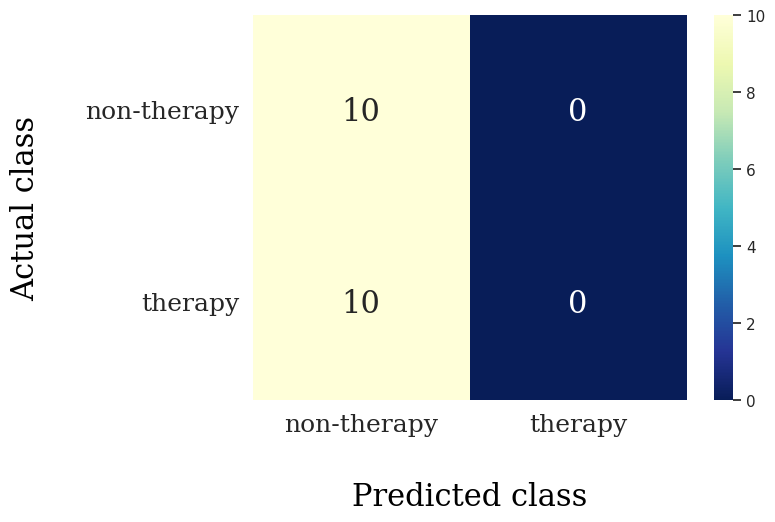

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

#5️⃣ ML //ANN Classifier

In [ ]:

import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

###Mean fv ANN

1.3.1) solver กำหนด ‘lbfgs’, ‘sgd’ และ ‘adam’

1.3.2) alpha กำหนด 0.0001, 0.001, 0.01 และ 0.1

1.3.3) hidden_layer_sizes กำหนด 100, 300 และ 400

In [ ]:
solver = ['lbfgs', 'sgd' , 'adam']
alpha = [1e-4, 1e-3, 1e-2, 1e-1]
hidden_layer_sizes = [100, 300, 400]

clf = MLPClassifier(random_state=1)
param_gridclf = {
    'solver': solver,
    'alpha': alpha,
    'hidden_layer_sizes': hidden_layer_sizes
}

grid_search = GridSearchCV(clf, param_gridclf, cv=10)

bestANN = grid_search.fit(X_train, y_train)
bestANN_ = bestANN.best_params_

ANNOpt = MLPClassifier(random_state=1, solver = bestANN_['solver'], alpha = bestANN_['alpha'], hidden_layer_sizes = bestANN_['hidden_layer_sizes'])
modelANNOpt = ANNOpt.fit(X_train, y_train)

print(bestANN_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of i

{'alpha': 0.1, 'hidden_layer_sizes': 100, 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#import pandas as pd
#results_df = pd.DataFrame(SVM.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# Display the DataFrame
#print(results_df)

In [ ]:
y_predANN = ANNOpt.predict(X_test)

print(classification_report(y_test, y_predANN))
y_predANNRe = confusion_matrix(y_test, y_predANN)
print(y_predANNRe)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.50      0.67        10

    accuracy                           0.75        20
   macro avg       0.83      0.75      0.73        20
weighted avg       0.83      0.75      0.73        20

[[10  0]
 [ 5  5]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

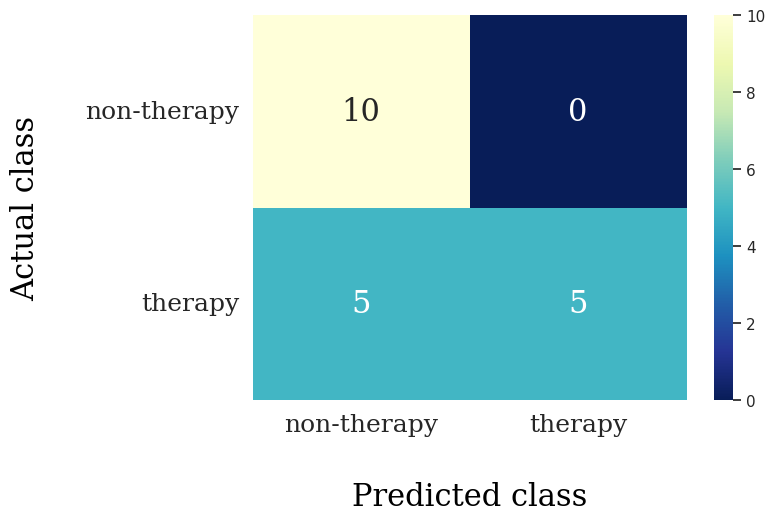

In [ ]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(y_predANNRe, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

###Mean fa-Normalization ANN

In [ ]:
solver = ['lbfgs', 'sgd' , 'adam']
alpha = [1e-4, 1e-3, 1e-2, 1e-1]
hidden_layer_sizes = [100, 300, 400]

clfNor = MLPClassifier(random_state=1)
param_gridclfNor = {
    'solver': solver,
    'alpha': alpha,
    'hidden_layer_sizes': hidden_layer_sizes
}

grid_searchNor = GridSearchCV(clfNor, param_gridclfNor, cv=10)

bestANNNor = grid_searchNor.fit(X_train_norm, y_train)
bestANNNor_ = bestANNNor.best_params_

ANNNorOpt = MLPClassifier(random_state=1, solver = bestANNNor_['solver'], alpha = bestANNNor_['alpha'], hidden_layer_sizes = bestANNNor_['hidden_layer_sizes'])
modelANNNorOpt = ANNNorOpt.fit(X_train_norm, y_train)

print(bestANNNor_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

{'alpha': 0.0001, 'hidden_layer_sizes': 400, 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
y_predANNNor = ANNNorOpt.predict(X_test)

print(classification_report(y_test, y_predANNNor))
y_predANNReNor = confusion_matrix(y_test, y_predANNNor)
print(y_predANNReNor)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20

[[10  0]
 [10  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

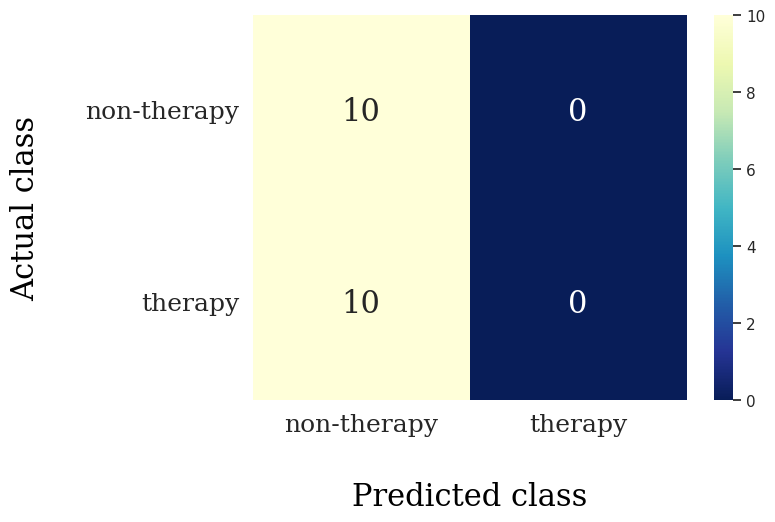

In [ ]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(y_predANNReNor, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

#6️⃣ ML // KNN Classifier

1.1.1) n_neighbors กำหนด 3, 5, 7 และ 9

1.1.2) Weights กำหนด ‘uniform’และ ‘distance’

###Mean fv KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
n_neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']  # Corrected parameter name

knn = KNeighborsClassifier()
param_gridknn = {
    'n_neighbors': n_neighbors,
    'weights': weights  # Corrected parameter name
}

grid_search_knn = GridSearchCV(knn, param_gridknn, cv=10)

bestknn = grid_search_knn.fit(X_train, y_train)
bestknn_ = bestknn.best_params_

knnOpt = KNeighborsClassifier(n_neighbors=bestknn_['n_neighbors'], weights=bestknn_['weights'])  # Corrected parameter name
modelknnOpt = knnOpt.fit(X_train, y_train)

print(bestknn_)

{'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
y_predknn = modelknnOpt.predict(X_test)

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_predknn))

cmknn = (confusion_matrix(y_test, y_predknn))#performance
print(cmknn)

              precision    recall  f1-score   support

           0       0.40      0.60      0.48        10
           1       0.20      0.10      0.13        10

    accuracy                           0.35        20
   macro avg       0.30      0.35      0.31        20
weighted avg       0.30      0.35      0.31        20

[[6 4]
 [9 1]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

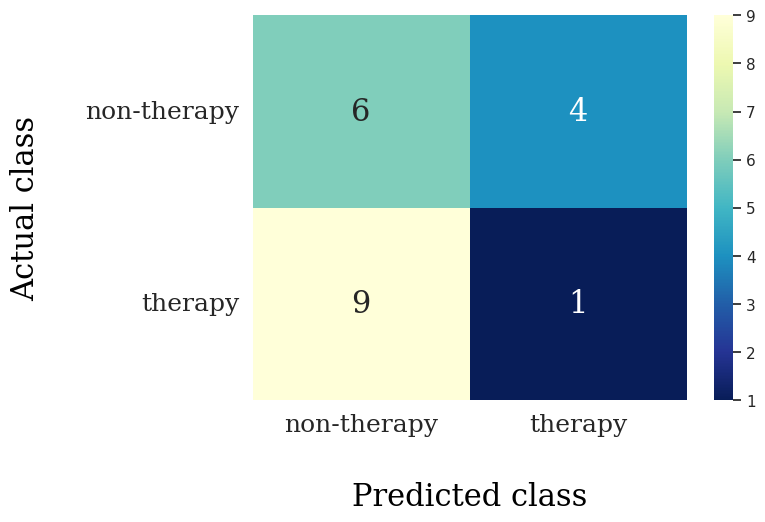

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cmknn, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

###Mean fa-Normalization ANN

In [ ]:
X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
n_neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']  # Corrected parameter name

knnNor = KNeighborsClassifier()
param_gridknnNor = {
    'n_neighbors': n_neighbors,
    'weights': weights  # Corrected parameter name
}

grid_search_knnNor = GridSearchCV(knnNor, param_gridknnNor, cv=10)

bestknnNor = grid_search_knnNor.fit(X_train_norm, y_train)
bestknnNor_ = bestknnNor.best_params_

knnNorOpt = KNeighborsClassifier(n_neighbors=bestknnNor_['n_neighbors'], weights=bestknnNor_['weights'])  # Corrected parameter name
modelknnNorOpt = knnOpt.fit(X_train_norm, y_train)

print(bestknn_)

{'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
y_predknnNor = modelknnNorOpt.predict(X_test)

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_predknnNor))

cmknnNor = (confusion_matrix(y_test, y_predknnNor))#performance
print(cmknnNor)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20

[[10  0]
 [10  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

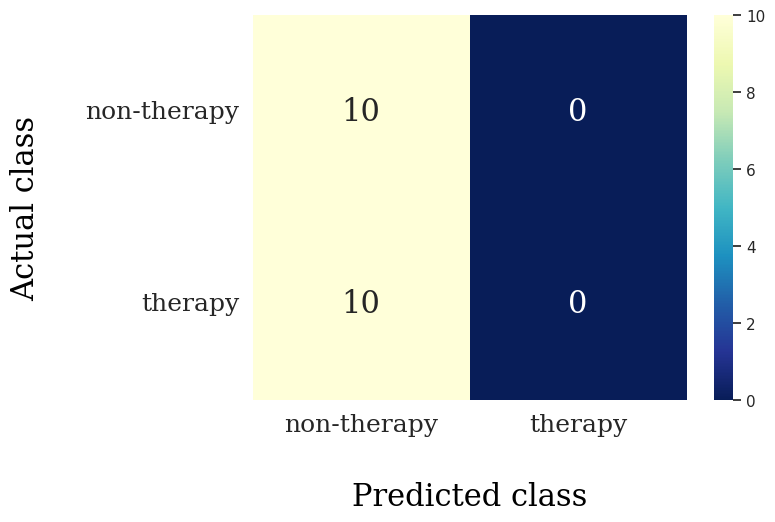

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}



sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cmknnNor, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) # Blues, Oranges, Reds, YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)